## imports

In [310]:
import pandas as pd
import numpy as np
import datetime
from ggplot import *
import altair as alt
from altair.expr import datum
alt.renderers.enable('notebook')

RendererRegistry.enable('notebook')

In [8]:
def flatten_aggregated_dataframe(
    gdf, concat_name=True, concat_separator=' ', name_level=1, inplace=False):
    """
    Flatten aggregated DataFrame.

    Args:
        gdf: DataFrame obtained through aggregation.
        concat_name: Whether to concatenate original column name and
            aggregation function name in the case of MultiIndex columns.
        concat_separator: Which string to place between original column name
            and aggregation function name if concat_name is True.
        name_level: Which element of a column tuple to use in the case of 
            MultiIndex columns and concat_name == False. Should be 0 for 
            original column name and 1 for aggregation function name.
        inplace: Whether to modify the aggregated DataFrame directly 
            (or return a copy).
    """
    if not inplace:
        gdf = gdf.copy()
    if type(gdf.columns) == pd.core.index.MultiIndex:
        if concat_name:
            columns = [concat_separator.join(col) for col in gdf.columns]
        else:
            columns = [col[name_level % 2] for col in gdf.columns]
        gdf.columns = columns
    return gdf.reset_index()

## create description file

## loading csv files

In [159]:
entrees = pd.read_csv("bulyon-csv/entrees-bulyon.csv", parse_dates=[0], dayfirst=True, index_col=None, sep=";")
sorties = pd.read_csv("bulyon-csv/sorties-bulyon.csv", parse_dates=[0], dayfirst=True, index_col=None, sep=";")
visiteurs = pd.read_csv("bulyon-csv/visiteurs-bulyon.csv", parse_dates=[0], dayfirst=True, index_col=None, sep=";")


entrees = entrees.rename(index=str, columns={"Date": "date"})
sorties = sorties.rename(index=str, columns={"Date": "date"})
visiteurs = visiteurs.rename(index=str, columns={"Date": "date"})

entrees = entrees.drop(['total'],axis=1)
sorties = sorties.drop(['total'],axis=1)
visiteurs = visiteurs.drop(['total'],axis=1)

In [160]:
entries.head()
sorties.head()
visiteurs.head()

,date,BU Rockefeller,BU Sciences Doua,BU Lyon-Sud,BU Croix-Rousse,BU Odontologie,Sciences Po Lyon,BU Chevreul,BU Bron,Bib Marie Curie,BU Manufacture - Lyon 3,Learning Hub Lyon - Ecully,maker's lab Lyon - Ecully,Bib Michel Serres,atelier makers' lab Lyon - Ecully
0,2018-09-01,0.00,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,1.0769,0.0000,0.0000,0.0
1,2018-09-02,0.00,0.0,0.0000,0.0000,0.0,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0
2,2018-09-03,189.25,77.3,34.3333,7.3182,1.6,15.5714,72.2222,7.6111,12.3889,53.5217,13.8621,6.0345,6.2083,0.0
3,2018-09-04,213.10,107.1,35.7222,6.9091,0.5,20.2857,76.2222,10.5000,37.6667,86.4348,34.7586,0.1724,3125.0000,0.0
4,2018-09-05,125.80,93.6,35.9444,21.5909,2.4,17.5714,73.3889,12.2222,12.8889,146.7826,36.1379,0.6897,6.5000,0.0


In [161]:
entrees = pd.melt(entrees, id_vars=['date'], var_name=['institution'], value_name="entrees")
sorties = pd.melt(sorties, id_vars=['date'], var_name=['institution'], value_name="sorties")
sorties.drop(sorties.columns[[0,1]], axis=1, inplace=True)
visiteurs = pd.melt(visiteurs, id_vars=['date'], var_name=['institution'], value_name="visiteurs")
visiteurs.drop(visiteurs.columns[[0,1]], axis=1, inplace=True)
entrees.head()

,date,institution,entrees
0,2018-09-01,BU Rockefeller,0
1,2018-09-02,BU Rockefeller,0
2,2018-09-03,BU Rockefeller,1915
3,2018-09-04,BU Rockefeller,2151
4,2018-09-05,BU Rockefeller,2669


In [162]:
sorties.head()

,sorties
0,0
1,0
2,1915
3,2151
4,2669


In [163]:
visiteurs.head()

,visiteurs
0,0.00
1,0.00
2,189.25
3,213.10
4,125.80


In [164]:
visites = pd.concat([entrees, sorties, visiteurs], axis=1, join_axes=[entrees.index])
visites.head()

,date,institution,entrees,sorties,visiteurs
0,2018-09-01,BU Rockefeller,0,0,0.00
1,2018-09-02,BU Rockefeller,0,0,0.00
2,2018-09-03,BU Rockefeller,1915,1915,189.25
3,2018-09-04,BU Rockefeller,2151,2151,213.10
4,2018-09-05,BU Rockefeller,2669,2669,125.80


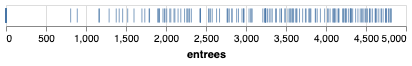

In [165]:
alt.Chart(visites.loc[visites['institution'] == 'BU Rockefeller']).mark_tick().encode(
    x='entrees')

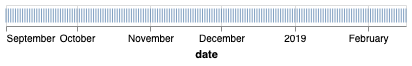

In [166]:
alt.Chart(visites.loc[visites['institution'] == 'BU Rockefeller']).mark_tick().encode(
    x='date')

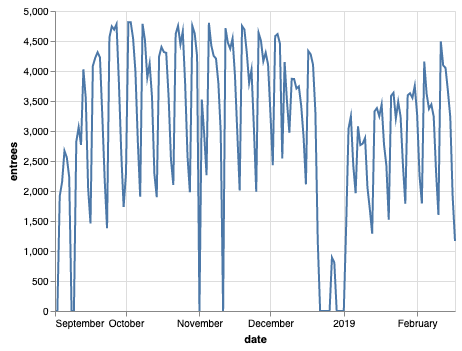

In [167]:
alt.Chart(visites.loc[visites['institution'] == 'BU Rockefeller']).mark_line().encode(
    x='date',
    y='entrees'
)


## re-structuring table

In [168]:
visites['year'] = visites['date'].dt.year
visites['month'] = visites['date'].dt.month
visites['week'] = visites['date'].dt.week
visites['day'] = visites['date'].dt.day
visites.head()

,date,institution,entrees,sorties,visiteurs,year,month,week,day
0,2018-09-01,BU Rockefeller,0,0,0.00,2018,9,35,1
1,2018-09-02,BU Rockefeller,0,0,0.00,2018,9,35,2
2,2018-09-03,BU Rockefeller,1915,1915,189.25,2018,9,36,3
3,2018-09-04,BU Rockefeller,2151,2151,213.10,2018,9,36,4
4,2018-09-05,BU Rockefeller,2669,2669,125.80,2018,9,36,5


## compute cumulative data

In [169]:
visites = visites.sort_values(['institution','year', 'month','day'], ascending=True)

In [170]:
visites.reset_index(drop=True)
visites['sumentrees'] = visites.groupby(['institution'])['entrees'].cumsum()
visites['sumsorties'] = visites.groupby(['institution'])['sorties'].cumsum()
visites['sumvisiteurs'] = visites.groupby(['institution'])['visiteurs'].cumsum()

1190        0
1191        0
1192      172
1193      369
1194      562
1195      995
1196     1379
1197     1379
1198     1379
1199     1826
1200     2407
1201     2949
1202     3442
1203     3744
1204     3744
1205     3744
1206     5607
1207     7797
1208     9684
1209    11400
1210    12350
1211    12350
1212    12350
1213    15056
1214    17850
1215    20462
1216    22871
1217    24139
1218    24139
1219    24139
        ...  
2010    24777
2011    24777
2012    25070
2013    25402
2014    25507
2015    25833
2016    25971
2017    25971
2018    25971
2019    26258
2020    26682
2021    26905
2022    27119
2023    27300
2024    27300
2025    27300
2026    27582
2027    27980
2028    28177
2029    28655
2030    28845
2031    28845
2032    28845
2033    29156
2034    29889
2035    30133
2036    30439
2037    30576
2038    30576
2039    30576
Name: entrees, Length: 2380, dtype: int64

In [173]:
visites.head()

,date,institution,entrees,sorties,visiteurs,year,month,week,day,sumentrees,sumsorties,sumvisiteurs
1190,2018-09-01,BU Bron,0,0,0.0000,2018,9,35,1,0,0,0.0000
1191,2018-09-02,BU Bron,0,0,0.0000,2018,9,35,2,0,0,0.0000
1192,2018-09-03,BU Bron,172,172,7.6111,2018,9,36,3,172,172,7.6111
1193,2018-09-04,BU Bron,197,197,10.5000,2018,9,36,4,369,369,18.1111
1194,2018-09-05,BU Bron,193,193,12.2222,2018,9,36,5,562,562,30.3333


In [181]:
#cols = list(visites.columns.values)
visites = visites[['date',
 'year',
 'month',
 'week',
 'day',
 'institution',
 'entrees',
 'sorties',
 'visiteurs',
 'sumentrees',
 'sumsorties',
 'sumvisiteurs']]

In [182]:
visites.head()

,date,year,month,week,day,institution,entrees,sorties,visiteurs,sumentrees,sumsorties,sumvisiteurs
1190,2018-09-01,2018,9,35,1,BU Bron,0,0,0.0000,0,0,0.0000
1191,2018-09-02,2018,9,35,2,BU Bron,0,0,0.0000,0,0,0.0000
1192,2018-09-03,2018,9,36,3,BU Bron,172,172,7.6111,172,172,7.6111
1193,2018-09-04,2018,9,36,4,BU Bron,197,197,10.5000,369,369,18.1111
1194,2018-09-05,2018,9,36,5,BU Bron,193,193,12.2222,562,562,30.3333


In [183]:
visites.to_csv("bu-lyon-clean.csv", sep=',', encoding='utf-8', index=False)

In [366]:
visites

,date,year,month,week,day,institution,entrees,sorties,visiteurs,sumentrees,sumsorties,sumvisiteurs,Totalentrees
0,2018-09-01,2018,9,35,1,BU Bron,0,0,0.0000,0,0,0.0000,215213
1,2018-09-02,2018,9,35,2,BU Bron,0,0,0.0000,0,0,0.0000,215213
2,2018-09-03,2018,9,36,3,BU Bron,172,172,7.6111,172,172,7.6111,215213
3,2018-09-04,2018,9,36,4,BU Bron,197,197,10.5000,369,369,18.1111,215213
4,2018-09-05,2018,9,36,5,BU Bron,193,193,12.2222,562,562,30.3333,215213
5,2018-09-06,2018,9,36,6,BU Bron,433,433,26.0000,995,995,56.3333,215213
6,2018-09-07,2018,9,36,7,BU Bron,384,384,17.5556,1379,1379,73.8889,215213
7,2018-09-08,2018,9,36,8,BU Bron,0,0,0.0000,1379,1379,73.8889,215213
8,2018-09-09,2018,9,36,9,BU Bron,0,0,0.0000,1379,1379,73.8889,215213
9,2018-09-10,2018,9,37,10,BU Bron,447,447,16.3889,1826,1826,90.2778,215213


In [377]:
visites = pd.read_csv("bu-lyon-clean-total.csv", parse_dates=[0], dayfirst=True, index_col=None, sep=";")
visites['institution'] = visites['institution'].str.replace("maker's",'makers')
visites['institution'] = visites['institution'].str.replace("makers'",'makers')

visites

,date,year,month,week,day,institution,entrees,sorties,visiteurs,sumentrees,sumsorties,sumvisiteurs,Totalentrees
0,2018-09-01,2018,9,35,1,BU Bron,0,0,0.0000,0,0,0.0000,215213
1,2018-09-02,2018,9,35,2,BU Bron,0,0,0.0000,0,0,0.0000,215213
2,2018-09-03,2018,9,36,3,BU Bron,172,172,7.6111,172,172,7.6111,215213
3,2018-09-04,2018,9,36,4,BU Bron,197,197,10.5000,369,369,18.1111,215213
4,2018-09-05,2018,9,36,5,BU Bron,193,193,12.2222,562,562,30.3333,215213
5,2018-09-06,2018,9,36,6,BU Bron,433,433,26.0000,995,995,56.3333,215213
6,2018-09-07,2018,9,36,7,BU Bron,384,384,17.5556,1379,1379,73.8889,215213
7,2018-09-08,2018,9,36,8,BU Bron,0,0,0.0000,1379,1379,73.8889,215213
8,2018-09-09,2018,9,36,9,BU Bron,0,0,0.0000,1379,1379,73.8889,215213
9,2018-09-10,2018,9,37,10,BU Bron,447,447,16.3889,1826,1826,90.2778,215213
